In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import mlrose
from datetime import datetime


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


credit=np.genfromtxt('../dataset/german.data-numeric.txt') 
X,y = credit[:,:-1], credit[:,-1:].squeeze() 
print(X.shape, y.shape)

# Change 2 to 0, to make it a binary problem
y[y == 2] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # One hot encode target values
# one_hot = OneHotEncoder()

# y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
# y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()


print(y_test)


(1000, 24) (1000,)
[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1.]


Total Time:  421.562


<IPython.core.display.Javascript object>


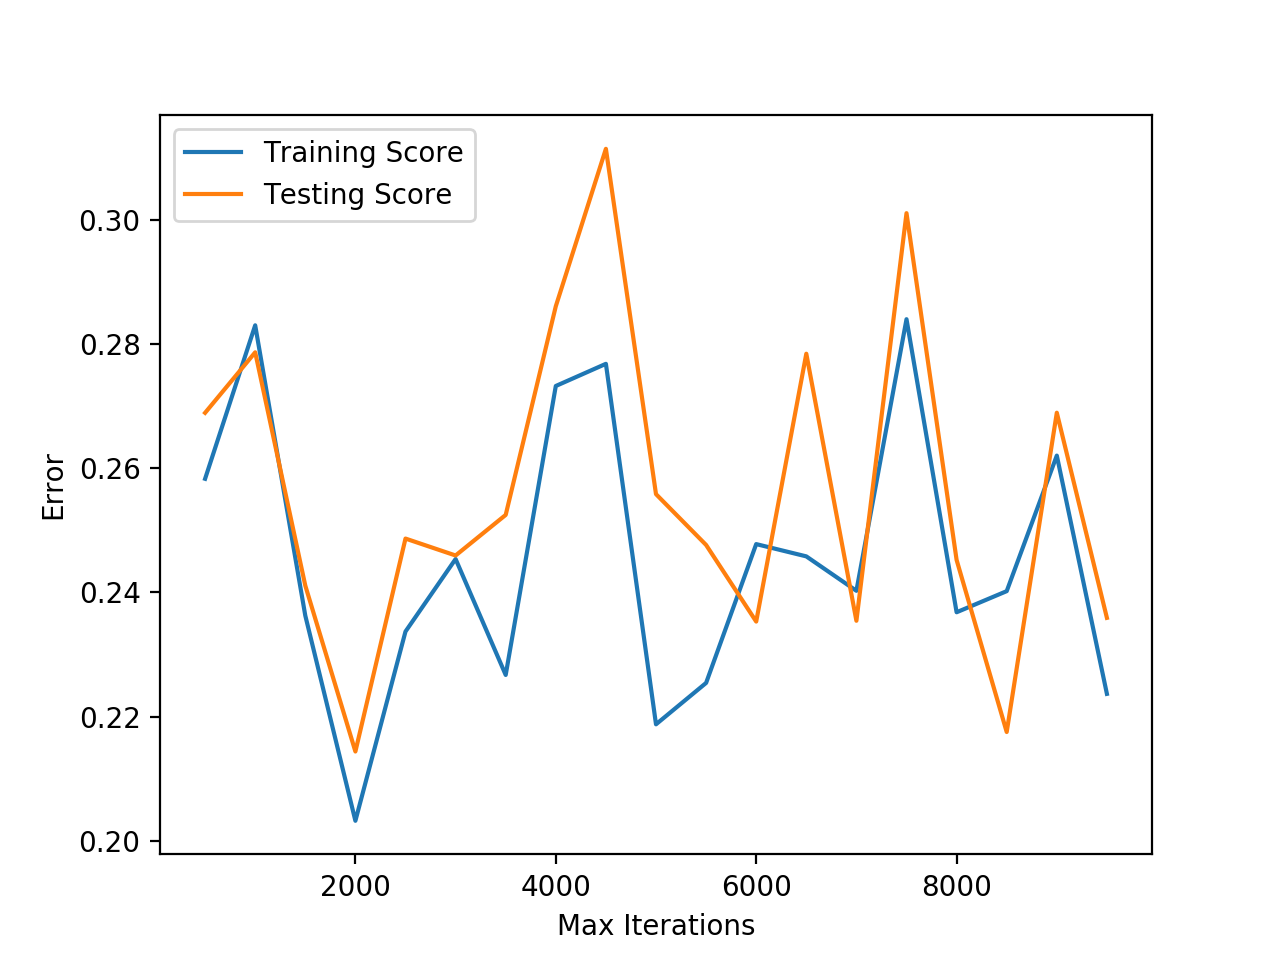

In [16]:


np.random.seed(3)
max_iters = range(500,10000,500)


def get_scores(max_iters):
    train_scores = []
    test_scores = []
    train_times = []
    for max_iter in max_iters:
        _test_scores = []
        _train_scores = []
        _train_times = []
        for j in range(3):
            clf = mlrose.NeuralNetwork(
                hidden_nodes = [90], 
                activation = 'tanh',
                algorithm = 'genetic_alg',
                max_iters = max_iter,
                bias = True,
                is_classifier = True,
                learning_rate = 0.5,
                early_stopping = True,
                pop_size=200,
                mutation_prob=0.5,
                clip_max = 5,
                max_attempts = 10
            )

            start_time = datetime.now()
            clf.fit(X_train_scaled, y_train)
            time_diff = datetime.now() - start_time
            


            y_pred_train = clf.predict(X_train_scaled)
            y_pred_test = clf.predict(X_test_scaled)

            train_score = 1 - f1_score(y_train, y_pred_train, average='binary')
            test_score = 1 - f1_score(y_test, y_pred_test, average='binary')

            _train_scores.append(train_score)
            _test_scores.append(test_score)
            _train_times.append(time_diff.microseconds/1000)
        train_scores.append(np.mean(_train_scores))
        test_scores.append(np.mean(_test_scores))
        train_times.append(np.max(_train_times))
    return train_scores,test_scores,train_times

total_start_time = datetime.now()
gd_train_scores,gd_test_scores,gd_train_times=get_scores(max_iters)
total_time_diff = datetime.now() - total_start_time  
print("Total Time: ",total_time_diff.microseconds/1000)

plt.plot(max_iters, gd_train_scores, label="Training Score")
plt.plot(max_iters, gd_test_scores, label="Testing Score")
plt.xlabel(f"Max Iterations")
plt.ylabel(f"Error")
plt.legend(loc="best")
plt.show()

In [ ]:
# plt.plot(max_iters, gd_train_times)
# plt.xlabel(f"Max Iterations")
# plt.ylabel(f"Error")
# plt.show()

In [12]:
for i in [10,50,100,200,300,400]:
    score = []
    for f in range(3):
        clf = mlrose.NeuralNetwork(
            hidden_nodes = [90], 
            activation = 'tanh',
            algorithm = 'genetic_alg',
            max_iters = 1000,
            bias = True,
            is_classifier = True,
            learning_rate = 0.5,
            early_stopping = True,
            pop_size=40,
            mutation_prob=0.5,
            clip_max = 5,
            max_attempts = i
        )

        clf.fit(X_train_scaled, y_train)

        y_pred_train = clf.predict(X_train_scaled)
        y_pred_test = clf.predict(X_test_scaled)

        train_score = f1_score(y_train, y_pred_train, average='binary')
        score.append(train_score)
    print(f"{i}, {np.mean(score)}")



10, 0.7234331840166205
50, 0.790515336141902
100, 0.7340857423462449


KeyboardInterrupt: 

Total Time:  62.522


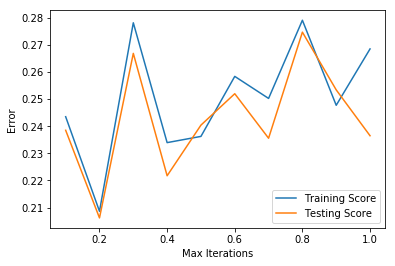

In [2]:
params = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

def get_scores(params):
    train_scores = []
    test_scores = []
    train_times = []
    for i in params:
        _test_scores = []
        _train_scores = []
        _train_times = []
        for j in range(3):
            clf = mlrose.NeuralNetwork(
                hidden_nodes = [90], 
                activation = 'tanh',
                algorithm = 'genetic_alg',
                max_iters = 2000,
                bias = True,
                is_classifier = True,
                learning_rate = i,
                early_stopping = True,
                pop_size=200,
                mutation_prob=0.5,
                clip_max = 5,
                max_attempts = 10
            )

            start_time = datetime.now()
            clf.fit(X_train_scaled, y_train)
            time_diff = datetime.now() - start_time
            


            y_pred_train = clf.predict(X_train_scaled)
            y_pred_test = clf.predict(X_test_scaled)

            train_score = 1 - f1_score(y_train, y_pred_train, average='binary')
            test_score = 1 - f1_score(y_test, y_pred_test, average='binary')

            _train_scores.append(train_score)
            _test_scores.append(test_score)
            _train_times.append(time_diff.microseconds/1000)
        train_scores.append(np.mean(_train_scores))
        test_scores.append(np.mean(_test_scores))
        train_times.append(np.max(_train_times))
    return train_scores,test_scores,train_times

total_start_time = datetime.now()
gd_train_scores,gd_test_scores,gd_train_times=get_scores(params)
total_time_diff = datetime.now() - total_start_time  
print("Total Time: ",total_time_diff.microseconds/1000)


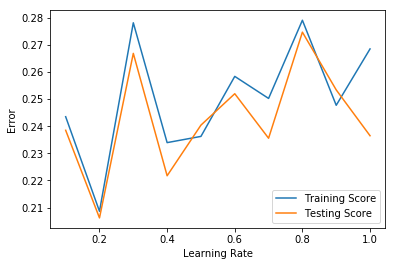

In [4]:
plt.close()
plt.plot(params, gd_train_scores, label="Training Score")
plt.plot(params, gd_test_scores, label="Testing Score")
plt.xlabel(f"Learning Rate")
plt.ylabel(f"Error")
plt.legend(loc="best")
plt.show()

Total Time:  450.947


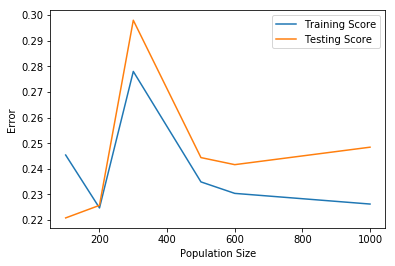

In [7]:
params = [100,200,300,500,600,1000]

def get_scores(params):
    train_scores = []
    test_scores = []
    train_times = []
    for i in params:
        _test_scores = []
        _train_scores = []
        _train_times = []
        for j in range(3):
            clf = mlrose.NeuralNetwork(
                hidden_nodes = [90], 
                activation = 'tanh',
                algorithm = 'genetic_alg',
                max_iters = 2000,
                bias = True,
                is_classifier = True,
                learning_rate = 0.2,
                early_stopping = True,
                pop_size=i,
                mutation_prob=0.5,
                clip_max = 5,
                max_attempts = 10
            )

            start_time = datetime.now()
            clf.fit(X_train_scaled, y_train)
            time_diff = datetime.now() - start_time
            


            y_pred_train = clf.predict(X_train_scaled)
            y_pred_test = clf.predict(X_test_scaled)

            train_score = 1 - f1_score(y_train, y_pred_train, average='binary')
            test_score = 1 - f1_score(y_test, y_pred_test, average='binary')

            _train_scores.append(train_score)
            _test_scores.append(test_score)
            _train_times.append(time_diff.microseconds/1000)
        train_scores.append(np.mean(_train_scores))
        test_scores.append(np.mean(_test_scores))
        train_times.append(np.max(_train_times))
    return train_scores,test_scores,train_times

total_start_time = datetime.now()
gd_train_scores,gd_test_scores,gd_train_times=get_scores(params)
total_time_diff = datetime.now() - total_start_time  
print("Total Time: ",total_time_diff.microseconds/1000)

plt.plot(params, gd_train_scores, label="Training Score")
plt.plot(params, gd_test_scores, label="Testing Score")
plt.xlabel(f"Population Size")
plt.ylabel(f"Error")
plt.legend(loc="best")
plt.show()